In [62]:
%pylab inline
from scipy.integrate import odeint
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [344]:
# Datos Llantas tractivas 
rll=0.139 # Radio geométrico de las llantas en traseras (m)
refc=0.98*rll # Radio efectivo llantas traseras (m)
rin=0.0631 #radio interno del neumático (m)

# Datos Transmisión 1
dp1=11.0 # Dientes del piñon
dpl1=39.0 # Dientes del plato
ng1=dpl1/dp1 # Relación de Transmisión


# Datos Transmisión 2
dp2=15 # Dientes del piñon
dpl2=60 # Dientes del plato
ng2=dpl2/dp2 # Relación de Transmisión
 
etaf=0.95 # Eficiencia de transmisión

# Datos eje llantas
reje=0.02 # Radio eje de las llantas (m)
meje=3.832 # Masa del eje (kg)

# Datos Kart general
masa=152.0 # masa del Kart (kg)
g=9.81 # Gravedad (m/s)
w=masa*g # peso del Kart (N)

# Datos Fuerzas de la fórmula de aceleración
rho=1.1955 # densidad del aire (kg/m^3)
dll=0.975 # Distancia entre ejes de llantas delanteras (m)
alj=0.88 # Altura con el piloto sentado en el kart (estatura 1.68 m) (m)
af=(dll*alj)/2 # Area Frontal Kart (m^2)
cd=0.89 # Coeficiente de Arrastre Kart
vw=0.0 # velocidad del viento (m/s)
theta=0.0 # Angulo carretera

# Inercias
ii=5.2E-3 # Inercia motor de combustión (kg m^2) 

mllt=1.43 # Masa llantas traseras (kg)
mlld=1.20 # Masa llantas delanteras (kg)
rlld=0.129 # Radio llantas delanteras (m)
rind=0.0631 # Radio rin llantas delanteras (m)
mbt=0.7*mllt # El porcentaje de la masa total que pesa la parte "banda" de la llanta trasera
mdt=0.3*mllt # El porcentaje de la masa total que pesa la parte "disco" de la llanta trasera
mbd=0.7*mlld # El porcentaje de la masa total que pesa la parte "banda" de la llanta delantera
mdd=0.3*mlld # El porcentaje de la masa total que pesa la parte "disco" de la llanta delantera
illd=(mbd*rlld)+(mdd*(rlld**2-rind**2))/2 # Inercia 1 llanta delantera (kg-m^2)
illt=(mbt*rll)+(mdt*(rll**2-rin**2))/2 # Inercia 1 llanta trasera (kg-m^2)

#paso=7.62 #(mm)
#rpim= paso*(0.6+(1/tan(180/dp))) # Radio Piñon (mm)
#rplam=paso*(0.6+(1/tan(180/dpl))) # Radio Plato (mm)
#rpi= rpim/1000 #Radio Piñon (m)
#rpla= rplam/1000 #Radio Plato (m)
rpi=0.01525#(m)
rpla=0.04096 #(m)
rhoac=7850.0 # Densidad del Acero (kg/m^3)
bpi=0.01 # Ancho piñon (m)
bpla=0.02 # Ancho plato (m)
vpi= bpi*np.pi*rpi**2 # Volumen del piñon (m^3)
vpla=bpla*np.pi*rpla**2 # Volumen del plato (m^3)
mpi=rhoac*vpi # Masa del piñon (kg)
mpla=rhoac*vpla # Masa del plato (kg)
ig=((mpi*(rpi**2))/2.0)+((mpla*(rpla**2))/2.0) # Inercia de la transmisión (kg-m^2)

ieje=(meje*reje**2)/2.0 # Inercia del eje de las llantas (kg-m^2)

# Fuerzas Aceleración
# Resistencia a la rodadura
a=0.2231 # Distancia del centro de gravedad al eje de la llanta trasera (m)
l=1.0063 # Distancia de eje de las llantas traseras y delanteras (m)
h=0.07478 # Altura del centro de gravedad del kart con respecto al piso (m)

masa_eq1 = 100 # ESto toca calcularlo correctamente
masa_eq2 = 200
masa_eq3 = 400

aceleracion = 1 # aceleracion

#Funciones
# Fuerza de arrastre
def farrastre(vx):
    farrastresol = (1/2)*rho*af*cd*vx**2
    return farrastresol


def frodadura(vx,ax):
    wr=w*((a/l)+(ax/g*(h/l))) # fuerza vertical sobre las llantas tractivas
    fr=0.01*(1+(vx/100.0)) # Factor de rodadura la velocidad del kart debe estar en (km/h)
    # fr=C*((mllt*g)/(rllt*2))*sqrt(ht/bllt)
    # ht=0.0739 # Altura del neumático (m)
    # bllt=0.209 # Ancho del neumático (m)
    # C= # Constante del material de la llanta
    return wr*fr*cos(theta) # (N)

def frodadura_const(vx):
    fr=0.01*(1+(vx/100.0)) # Factor de rodadura la velocidad del kart debe estar en (km/h)
    # fr=C*((mllt*g)/(rllt*2))*sqrt(ht/bllt)
    # ht=0.0739 # Altura del neumático (m)
    # bllt=0.209 # Ancho del neumático (m)
    # C= # Constante del material de la llanta
    return w*fr*cos(theta) # (N)

# Fuerza del ángulo de la carretera
def finclinacion(theta):
    return w*sin(theta) # (N)



# Fuerza de tracción, Torque del Motor
def ftraccion(ax,Fg,Fw,Fr):
    # Ft=((ti*ng*etaf)/refc)-(((ii-ig)*ng^2)+ieje+illd*2+illt*2)*(ax/(refc^2)) # (N)
    return masa*ax+Fg+Fw+Fr

# Velocidad angular del motor
def vangularmotor(vx):
    return (vx*ng)/refc # (rad/s)


In [345]:
vel_angular = linspace(0.1,5000,10000)

In [346]:
def potenciaMotor (omega):
    potencia = np.array(-3.6134E-8*(omega**3)+2.9953E-5*(omega**2)+(1.6696*omega)+5.4706E-1)
    return potencia

In [411]:
def plot_potencia(potencia):
    plt.plot(vel_angular,potencia,'k')
    plt.title('Potencia Vs. Velocidad angular')
    plt.xlabel('Velocidad Angular RPM')
    plt.ylabel('Potencia $ W $')
    plt.grid()
    plt.show()

In [348]:
def torqueMotor(omega):
    potencia = potenciaMotor(omega)
    torque = potencia/(omega*2*pi/60)
    #m = (torque[250]-torque[210])/(omega[250]-omega[210])
    #for n in range(0,200):
     #   torque[n] = m*omega[n]+43.5
    return np.array(torque)

In [414]:
def plot_torque(torque):
    plt.plot(vel_angular,torque,'k')
    plt.title('Torque Vs. Velocidad angular')
    plt.xlabel('Velocidad Angular RPM')
    plt.ylabel('Torque $ Nm $')
    plt.grid()
    plt.show()
    return

In [395]:
# Masa Equivalente 1 y Relación 1
def dveldt1(velv,t0):
    xx,vel = velv
    omega_llanta = vel/refc
    omega_motor = omega_llanta*ng1
    frod = frodadura_const(vel*3.6)
    farr = farrastre(vel)
    torque = torqueMotor(omega_motor)
    return [vel,(torque*ng*etaf/refc-frod-farr)/masa_eq1] # para solucionar
    # al tiempo posición y velocidad

In [351]:
# Masa Equivalente 2 y Relación 1
def dveldt2(velv,t0):
    xx,vel = velv
    omega_llanta = vel/refc
    omega_motor = omega_llanta*ng1
    frod = frodadura_const(vel*3.6)
    farr = farrastre(vel)
    torque = torqueMotor(omega_motor)
    return [vel,(torque*ng*etaf/refc-frod-farr)/masa_eq2] # para solucionar
    # al tiempo posición y velocidad

In [352]:
# Masa Equivalente 3 y Relación 1
def dveldt3(velv,t0):
    xx,vel = velv
    omega_llanta = vel/refc
    omega_motor = omega_llanta*ng1
    frod = frodadura_const(vel*3.6)
    farr = farrastre(vel)
    torque = torqueMotor(omega_motor)
    return [vel,(torque*ng*etaf/refc-frod-farr)/masa_eq3] # para solucionar
    # al tiempo posición y velocidad

In [336]:
# Masa Equivalente 1 y Relación 2
def dveldt4(velv,t0):
    xx,vel = velv
    omega_llanta = vel/refc
    omega_motor = omega_llanta*ng2
    frod = frodadura_const(vel*3.6)
    farr = farrastre(vel)
    torque = torqueMotor(omega_motor)
    return [vel,(torque*ng*etaf/refc-frod-farr)/masa_eq1] # para solucionar
    # al tiempo posición y velocidad
    
    # Masa Equivalente 2 y Relación 2
def dveldt5(velv,t0):
    xx,vel = velv
    omega_llanta = vel/refc
    omega_motor = omega_llanta*ng2
    frod = frodadura_const(vel*3.6)
    farr = farrastre(vel)
    torque = torqueMotor(omega_motor)
    return [vel,(torque*ng*etaf/refc-frod-farr)/masa_eq2] # para solucionar
    # al tiempo posición y velocidad
    
    # Masa Equivalente 3 y Relación 2
def dveldt6(velv,t0):
    xx,vel = velv
    omega_llanta = vel/refc
    omega_motor = omega_llanta*ng2
    frod = frodadura_const(vel*3.6)
    farr = farrastre(vel)
    torque = torqueMotor(omega_motor)
    return [vel,(torque*ng*etaf/refc-frod-farr)/masa_eq3] # para solucionar
    # al tiempo posición y velocidad

In [430]:
def dveldtf1(velv,t0):
    xx,vel = velv
    frod = frodadura_const(vel*3.6)
    farr = farrastre(vel)
    f_frenado = 700
    return [vel,(-f_frenado-farr-frod)/masa_eq1]

def dveldtf2(velv,t0):
    xx,vel = velv
    frod = frodadura_const(vel*3.6)
    farr = farrastre(vel)
    f_frenado = 700
    return [vel,(-f_frenado-farr-frod)/masa_eq3]

In [431]:
t_in = 0
t_fin = 10
deltat=0.001

x_0 = 0.1
v_0 = 0.1
c_ini = [x_0,v_0]
t = np.arange(t_in,t_fin,deltat)

tf_in = t_fin
tf_fin = t_fin+5
tf = np.arange(tf_in,tf_fin,deltat)

In [444]:
t_in_2 = 0
t_fin_2 = 100
deltat_2 =0.001
t_2 = np.arange(t_in_2,t_fin_2,deltat_2)

In [433]:
sol1 = odeint(dveldt1,c_ini,t)
sol2 = odeint(dveldt2,c_ini,t)
sol3 = odeint(dveldt3,c_ini,t)
sol4 = odeint(dveldt4,c_ini,t)
sol5 = odeint(dveldt5,c_ini,t)
sol6 = odeint(dveldt6,c_ini,t)

solf1 = odeint(dveldtf1,(sol1[-1,0],sol1[-1,1]),tf)
solf2 = odeint(dveldtf2,(sol1[-1,0],sol1[-1,1]),tf)

In [381]:
def plotting(sol1,sol2,masa):
    plt.plot(t, sol1[:, 0], 'k', label='posición1(t)')
    plt.plot(t, sol1[:, 1], color = '0.75', label='velocidad1(t)')
    plt.plot(t, sol2[:, 0], 'r', label='posición2(t)')
    plt.plot(t, sol2[:, 1], 'm', label='velocidad2(t)')
    plt.title('Velocidad y posición contra tiempo  $m=$ '+masa)
    plt.legend(loc='best')
    plt.xlabel('Tiempo')
    plt.grid()
    plt.show()
    return

In [436]:
def plottingFrenado(sol1,sol2,masa1,masa2):
    plt.plot(tf, sol1[:, 0], 'k', label='posición1(t)')
    plt.plot(tf, sol1[:, 1], color = '0.75', label='velocidad1(t)')
    plt.plot(tf, sol2[:, 0], 'r', label='posición2(t)')
    plt.plot(tf, sol2[:, 1], 'm', label='velocidad2(t)')
    plt.title('Velocidad y posición contra tiempo $m=$'+ masa1 +' y '+ masa2+ '$ kg $ ')
    plt.legend(loc='best')
    plt.xlabel('t')
    plt.grid()
    plt.show()

# Informe taller 2

* ### Torque y potencia del kart:

Para proceder con el análisis de la dinámica del kart es necesario primero caracterizar el torque y la potencia del motor del vehículo.

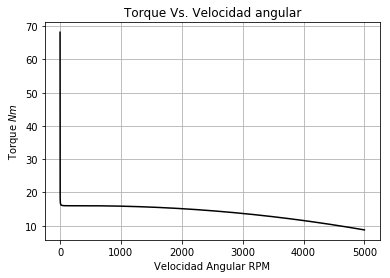

In [429]:
plot_torque(torqueMotor(vel_angular))

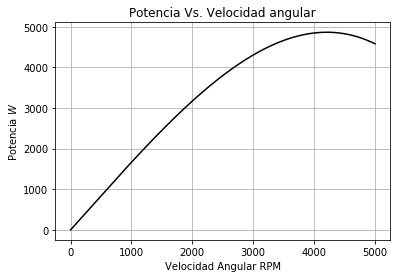

In [416]:
plot_potencia(potenciaMotor(vel_angular))

* ### Motivación:

Como proposito principal se planteó para este taller realizar una simulación de la dinámica de un vehiculo kart equipado con un motor elétrico.
Para esto, se tomarán diferentes parámetros de masas y relación de transmisión:

|$ m_{eq1}(kg) $|$ m_{eq2} (kg)$|$ m_{eq3}(kg) $|
|---|---|---|---|---|
|  100 | 200  | 400  | 

|$ n_{g1} $|$ n_{g2} $|
|---|---|
|  11:39 | 15:60  |  


* ### Desempeño de la aceleración:

Para la comparación se mostrará para una relacion dada, la posición y velocidad del kart para las tres diferentes relaciones de transmisión.

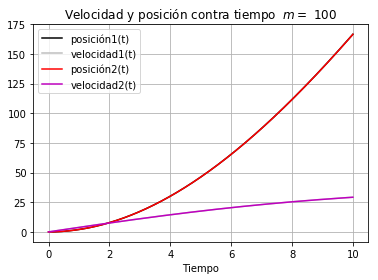

In [417]:
plotting(sol1,sol4,'100')

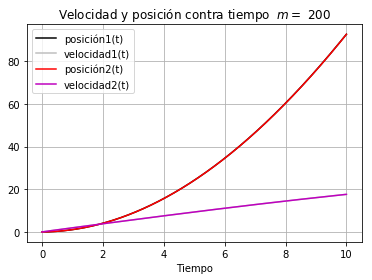

In [418]:
plotting(sol2,sol5,'200')

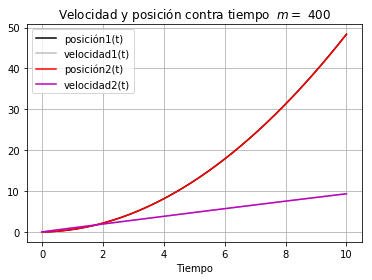

In [419]:
plotting(sol3,sol6,'400')

Como se puede ver en los gráficos, el factor de relación de transmisión no afecta la dinámica del kart. A diferencia de la relación, la masa si modifica los valores picos y las pendientes de la gráfica. Para una masa de 100kg se alcanza una velocidad máxima de 25 $ m/s $.

Para mostrar los efectos de la masa, a continuación se muestra para una relación de transmisión dada ($ 11:39 $) la gráfica de velocidad y posición contra el tiempo para dos masas diferentes ($ 100  $ y $ 400kg $)

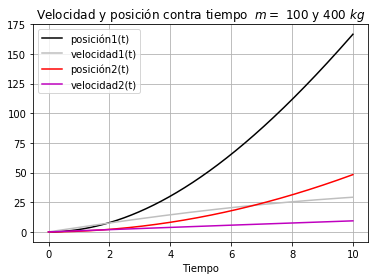

In [420]:
plotting(sol1,sol3,'100 y 400 $ kg $')

Ahora son claros los cambios en la dinámica del kart a causa del cambio en la masa. Esto es esperado ya que según la ecuación de Newton, la masa es inversamente proporcional a la aceleración de un cuerpo en movimiento y en contraste, la relación de transmisión solo afecta un componente de las fuerzas que actúan sobre el kart y es la fuerza generada por el torque del motor

* ### Desempeño del frenado:

Para el análisis del frenado se asumió una fuerza de frenado de 700N y se realizará solo el análisis para 2 masas diferentes ($ 100  $ y $ 400kg $). La relación de transmisión no tiene relevancia para el modelo de frenado utilizado. (La simulación modela el frenado desde el último instante que se acelera el vehículo dado por las anteriores simulaciones)

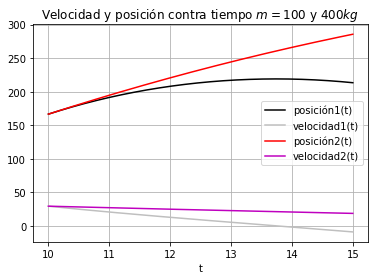

In [438]:
plottingFrenado(solf1,solf2,'100','400')

Como se puede observar en el gráfico, para una masa de 400 $ kg $, el vehículo no alcanza a detenerse por completo y la posición casi no varía, lo que nos indica que requiere de mucha mas fuerza en el frenado para detenerse. Por otro lado, para una masa de 100 $ kg $, el vehículo se detiene a los 14 segundos de empezar el frenado. Esto indica que la fuerza requerida para detener un vehículo es directamente proporcional a la masa del mismo.

In [446]:
solucion_ac = odeint(dveldt1,c_ini,t_2)

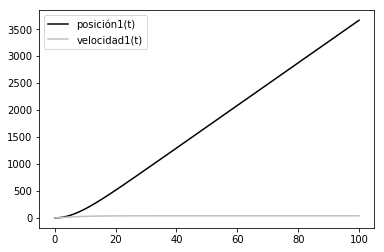

In [453]:
plt.plot(t_2,solucion_ac[:,0],'k', label='posición1(t)')
plt.plot(t_2, solucion_ac[:, 1], color = '0.75', label='velocidad1(t)')
plt.grid
plt.legend()